In [1]:
import os
import pickle

In [2]:
input_directory = '../models/classification/'

classification_models=[]
for file_name in os.listdir(input_directory):
  file_path = os.path.join(input_directory, file_name)
  with open(file_path, 'rb') as f:
    classification_models.append(pickle.load(f))

In [3]:
classification_models

[DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                        min_samples_leaf=2, min_samples_split=7,
                        random_state=42),
 RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                        min_samples_split=7, random_state=42),
 KNeighborsClassifier(n_neighbors=10, p=1, weights='distance'),
 BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10,
                                                  weights='distance'),
                   n_estimators=20),
 GaussianNB()]

In [4]:
import pandas as pd

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP/project/classification/classification_df_train.csv')

In [6]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP/project/classification/classification_df_test.csv')

In [7]:
X_train = df_train.drop('Species', axis=1)
X_test = df_test.drop('Species', axis=1)
y_train = df_train['Species']
y_test = df_test['Species']

In [8]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
def plot_score_comparison(score, X, y, average=None):
  model_names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'BaggingClassifier', 'GaussianNB']

  plt.figure(figsize=(15,5))

  for model, model_name in zip(classification_models, model_names):
    y_pred = model.predict(X)
    if (average is not None):
      score_value = score(y, y_pred, average=average)
    else: 
      score_value = score(y, y_pred)
    bar = plt.bar(model_name, score_value)
    height = bar[0].get_height()
    plt.text(bar[0].get_x() + bar[0].get_width() / 2.0, height, f'{score_value:.4f}', ha='center', va='bottom')
    plt.title(score.__name__, fontdict={'fontsize': 14, 'fontweight' :'bold'})

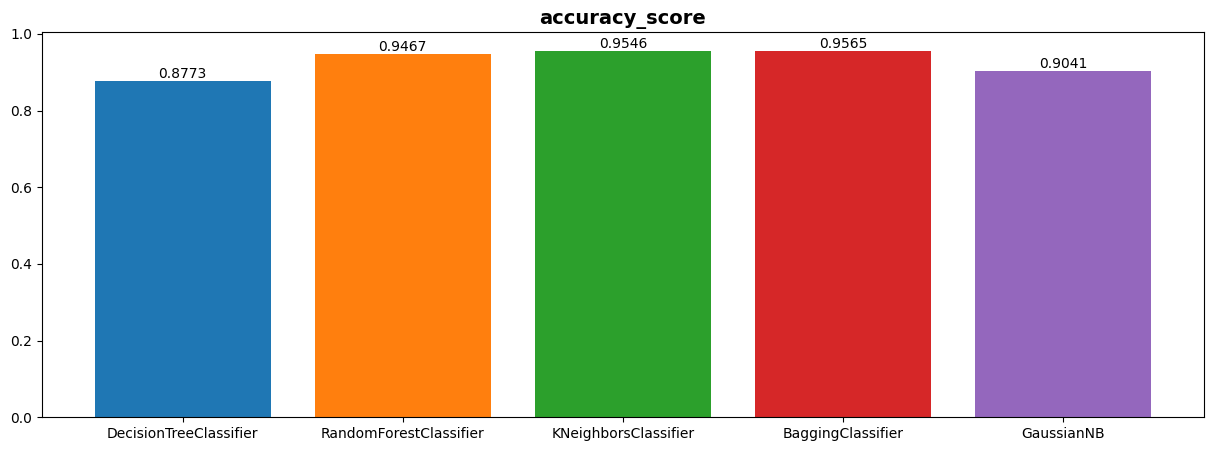

In [15]:
plot_score_comparison(accuracy_score, X_test, y_test)

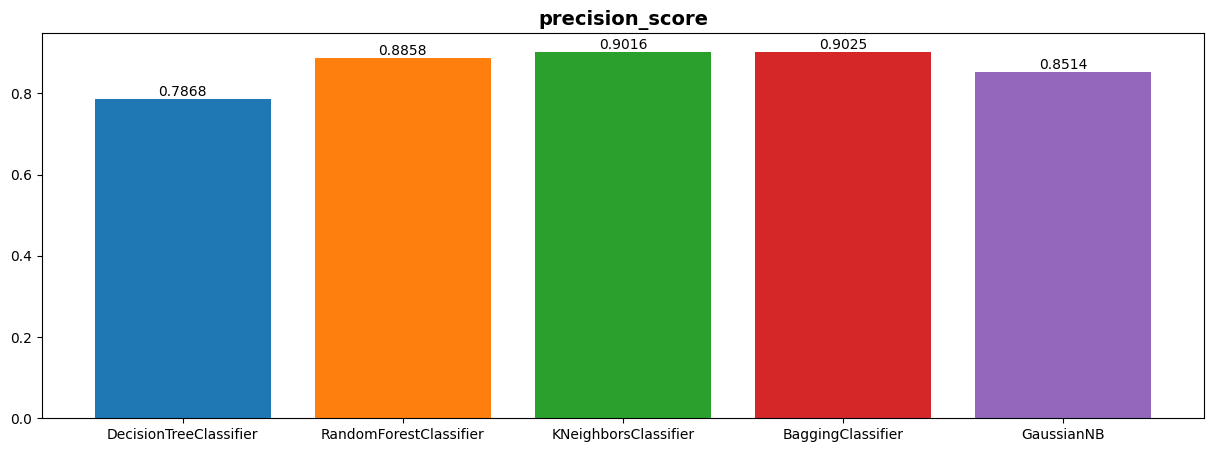

In [16]:
plot_score_comparison(precision_score, X_test, y_test, 'macro')

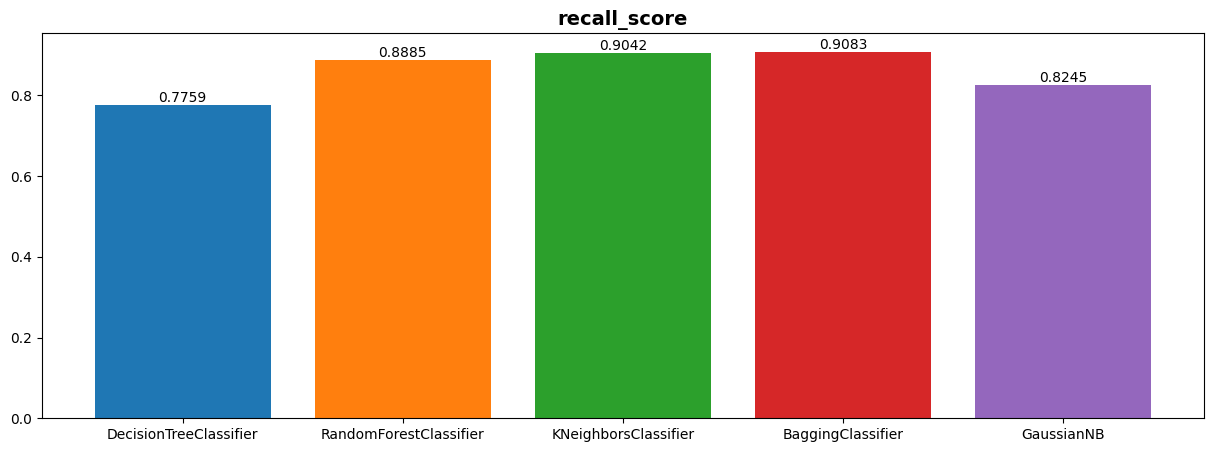

In [17]:
plot_score_comparison(recall_score, X_test, y_test, 'macro')

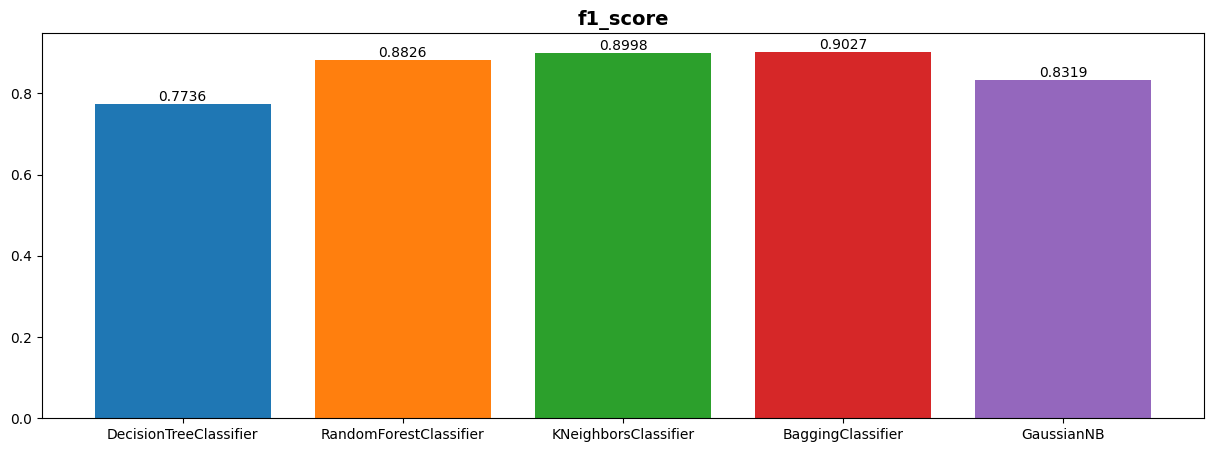

In [18]:
plot_score_comparison(f1_score, X_test, y_test, 'macro')

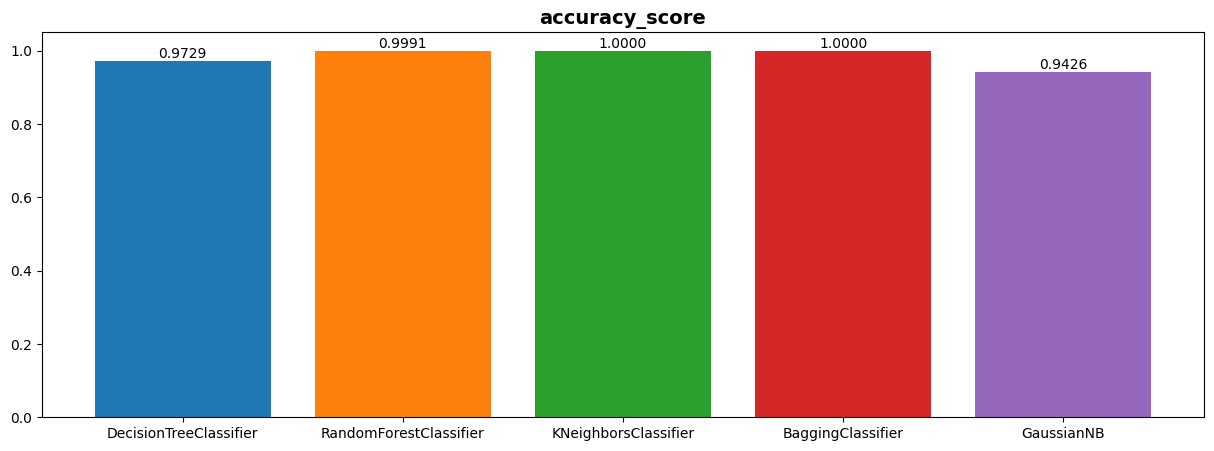

In [19]:
plot_score_comparison(accuracy_score, X_train, y_train)

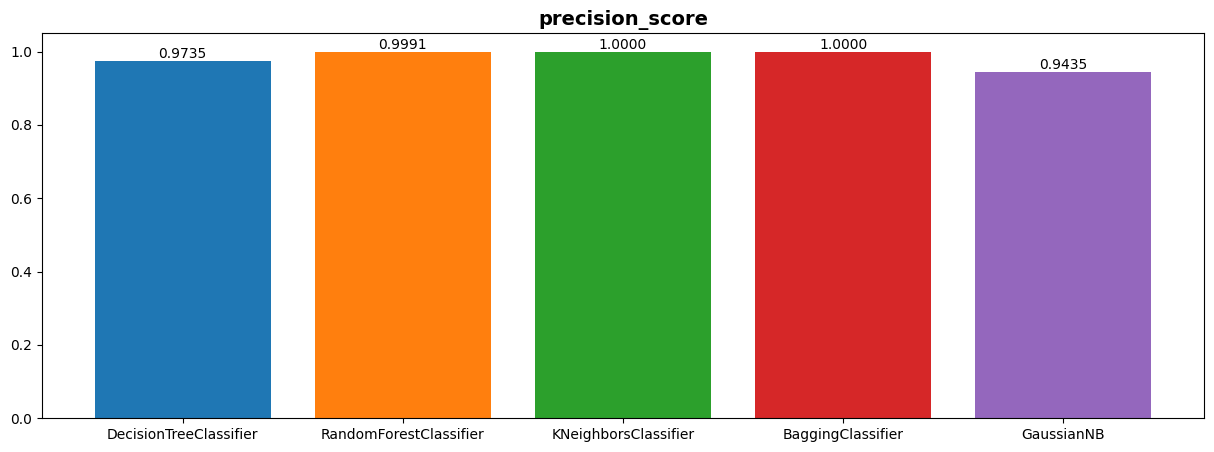

In [20]:
plot_score_comparison(precision_score, X_train, y_train, 'macro')

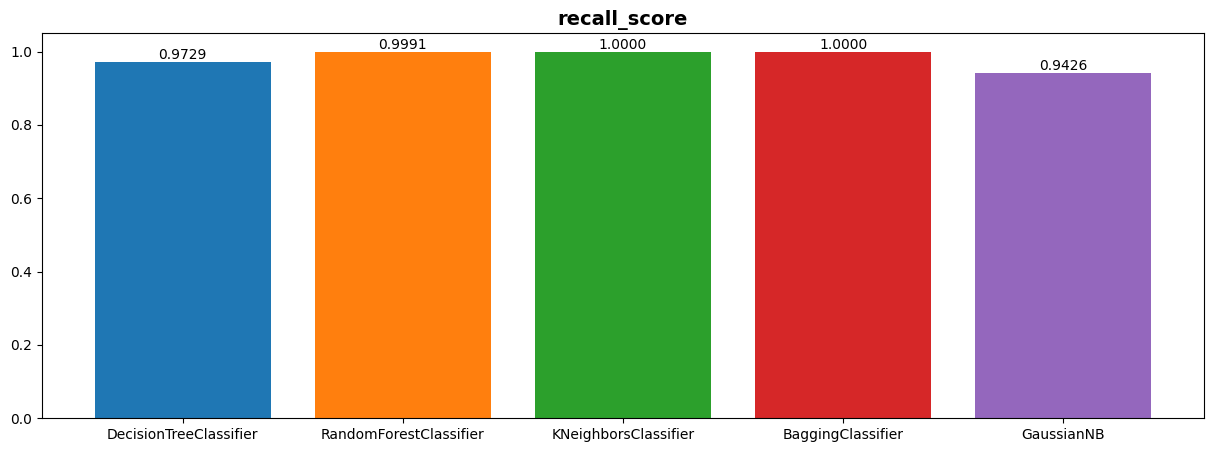

In [21]:
plot_score_comparison(recall_score, X_train, y_train, 'macro')

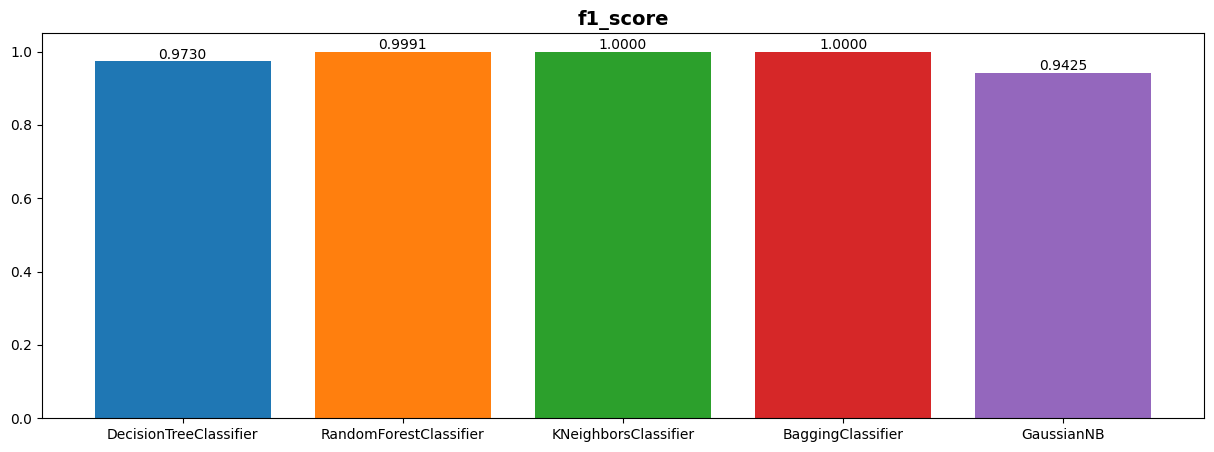

In [22]:
plot_score_comparison(f1_score, X_train, y_train, 'macro')